In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

This notebook is meant to be both a project report and tutorial in-one.   
Its parent repository which includes all project files can be found at:   
https://github.com/matijsv/pyplenet 

#### Sections
1. **Getting Started** : A very quick how-to install and use pyplenet. The idea is that a returning user may have a quick reminder to how this package works and give new users some context.
2. **Introduction** : A description of the project and the package.
3. **Input Data** : Presents the required format for the input data via a showcase of the example datafiles.
4. **Graph Construction and Parameter Description** : Describes the top-level graph constructor ```pyplenet.generate``` and its control parameters.
5. **Metadata** : How to handle, with an example, the information dictionaries that store the metadata describing nodes within the generated graphs.
6. **Subgraph extraction** : How to extract a subgraph of certain size around a chosen node.
7. **Analysis** : How to analyze the generated graphs using either the ```pyplenet.analysis``` module or the networkx conversion method. This section also functions as a validation for the proper functioning of this package. The subgraph produced as example for this tutorial/report is analyzed and results are discussed in the context of previous findings. A visualization of this subgraph is also presented.
8. **Export** : How to export the produced graphs to various formats using the ```pyplenet.export``` module.
9. **Example Experiment** : A worked example of an investigation using pyplenet-generated graphs.
10. **Discussion / Conclusion** : A discussion / conclusion section for the report, includes achievements, limitations and ideas for future work.
11. **References**

#### 1. Getting Started

**Installation:**   
```git clone https://github.com/matijsv/pyplenet.git```   
```cd pyplenet```   
   
One can either work in this directory directly or run ```pip install pyplenet``` and make it available to their selected python environment.   

**Usage:**    
Pyplenet is a package to be imported and used in-script, there is no CLI.

NOTE: Even simple usage requires properly formatted data files. These are described in section 3 of this tutorial.  
A simple usage example: Generating a network and exporting it to an edge list text file.
```
import pyplenet as pn

my_graph = pn.generate(
    pops_path  = 'GROUP-LEVEL POPULATION DATA FILE PATH',
    links_path = 'GROUP-LEVEL POPULATION DATA FILE PATH',
    preferential_attachment = 0.2,
    scale = 0.8,
    reciprocity = 0.1,
    base_path = "my_graph_data")

pn.export.edge_txt(my_graph)
```

#### 2. Introduction

#### The package
Pyplenet is a python package developed in the context of an Individual project for the MSc Computational Science under supervision by Dhruv Mittal and Vitor V. Vasconcelos. Pyplenet expands on the work done by Gulpen (2022) for his master's thesis in the field of computational sociology. This package synthesizes large scale individual-level networks using group-level population and interaction data. The name is a play on "people"-net, owing to its computational sociology background.

#### Theoretical Background
Social network graphs represent the web of human social interactions. Each individual (nodes) shares connections (edges) with others. These connections can represent a variety of relationships: family ties, friendships, professional connections, virtually any person-to-person "link". Using these graphs is a core part of modelling in the fields of epidemiology, sociology, economics and public policy (among others). This is due to the fact that all these fields study emergent phenomena which depend on individual-level interactions and/or decision making.

The generation of reality-faithful social graphs is a challenge rooted in the fact that generally, large individual-level relationship datasets are either unavailable or restricted (rightfully so, duty to privacy and security concerns). Tackling this challenge is a major source of development in network science. The common approach is to generate synthetic random networks with methods designed to replicate topological properties of real networks. A simple example is the Barabasi-Albert algorithm which focuses on replicating the power-law degree distributions often found in real networks (Barabási & Albert, 1999)(Clauset, Shalizi, & Newman, 2009). Note however that while power-law is present within these degree distributions, it usually only dictates a portion and the actual distribution is more complicated (Sala et al., 2011).

The less common approach is to take group-level datasets (which preserves the anonimity of individuals) and synthesize random networks which obey the figures given by those datasets. Group-level in this context is defined as relationship data of many indivuals aggregated by categories. For example, how many connections exist at a professional level between 20 to 30 year old foreign women and 40 to 50 year old Dutch women in Amsterdam. Note: I say less common, but there is precedent for this approach, an example is the Framework for Reconstructing Epidemiological Dynamics (FRED) (Grefenstette et al., 2013). Tools like FRED are niche, complex and highly targeted towards a specific implementation (epidemiology). This project tries to maintain simplicity, universality and ease-of-use, the goal is that various researchers may use the pyplenet module for generating synthetic networks to be used in their projects, regardless of research field.

#### Overall Project and Data Description   
Gulpen devised a framework for creating synthetic invidual-level interaction (person to person connection) networks for the city of Amsterdam by using anonymous group-level data from the Central Bureau of Statistics (CBS). This data categorized people in Amsterdam into groups based on *age*, *sex*, *ethnicity* and *education level*. One part of the data then defined the amount of people in each of these groups (group size data). Then for different "layers" the data defined the amount of connections between people in different groups (group interaction data). These layers included *neighbors*, *family*, *households*, *work / school*.

Pyplenet modularizes, documents and packages this framework so it is easily useable with any similar type of data (e.g. other cities, communities or relevant multi-group networks). To achieve this, pyplenet was made to be completely agnostic to the number of categories used to define groups, the names of these categories and the number of groups defined. It is only required that the definitions are consistent between the group size data and the group interaction data. Pyplenet can be used to generate multiple network layers which can then be combined and treated as a multiplexed networks for whatever application is necessary.

#### Network Construction   
The network construction revolves around the two group random network (2GRN) creation algorithm defined by Gulpen. The core principle of 2GRN is to recreate the preferential attachment mechanism present in the Barabasi-Albert network algorithm. An in-depth description of this algorithm can be found in Gulpen's thesis (Gulpen 2022). 

Pyplenet adapted 2GRN and preserved the parameters controlling the scale-free-ness and reciprocity of the generated networks. The reciprocity adds another element that reflects real life social networks. 

Importantly, the final degree dsitribution and reciprocity of the final networks are not entirely dictated by these parameters as there is already a certain level of both inherent to the user's supplied group-level data. 

#### Framework Expansion   
Beyond modularizing, documenting and packaging Gulpen's network construction framework, this project:
- Implemented a custom network data-object: ```pyplenet.graph.FileBasedGraph```, along with all the necessary handling methods, to generate the large (+1 000 000 node, +20 000 000 edge) network graphs with speed (< 5 minutes). This object:
  - Uses a file-based system to avoid exceeded RAM crashes while preserving fast access.
  - Retains metadata so a user may filter nodes by their groups or category values (e.g. *age* or *ethnicity*).
  - Includes a subgraph extraction method.
  - Includes a networkx object conversion method.
- Implemented a network analysis module.
- Implemented an export module which covers most standard network graph formats.
- Includes a tutorial and worked example of an investigation using pyplenet (included in this report).

#### 3. Input Data

PyPleNet requires two input files, group population and group interaction data, which can be either in ```.csv``` or ```.xlsx``` format.   

In this section an example for each input file: ```fake_tab_n.csv``` (group population) and ```tab_werkschool.xlsx``` (group interaction) are presented and their formats described. These files will also be used to generate the example network in this tutorial.

**Group Size Data** (`fake_tab_n.csv`): Defines groups by their characteristics and their sizes
- any number of colums define characteristic categories, the values under those columns represent the subcategory. (e.g category: ```age```, subcategory: ```[20,30)```)
- a column labelled ```'n'``` defines the size (in graph: number of nodes) of each group.

In [2]:
# Population data example
pop_data = pd.read_csv('Data/fake_tab_n.csv')
print(pop_data.head())

       etngrp  oplniv geslacht      lft      n
0  Autochtoon       3      Man   [0,20)  14442
1  Autochtoon       3      Man  [20,30)  14424
2  Autochtoon       3      Man  [30,40)  13526
3  Autochtoon       3      Man  [40,50)  10026
4  Autochtoon       3      Man  [50,60)   9424


**Group Interaction Data** (`tab_werkschool.xlsx`): Defines the number of connections (directed edges) between groups for a specific "layer".
- Each row contains information for two groups, a source group and a destination group. 
- A column labelled ```'n'``` defines the number of directed edges from the source group to destination group.
- The column category labels are divided via suffixes: ```'_src'``` for the source group and ```'_dst'``` for the destination group.

In [3]:
interaction_data = pd.read_excel('Data/tab_werkschool.xlsx')
print(interaction_data.head())

  geslacht_src lft_src  oplniv_src  etngrp_src geslacht_dst  lft_dst  \
0          Man  [0,20)           1  Autochtoon          Man   [0,20)   
1          Man  [0,20)           1  Autochtoon          Man   [0,20)   
2          Man  [0,20)           1  Autochtoon        Vrouw  [20,30)   
3          Man  [0,20)           1  Autochtoon        Vrouw   [0,20)   
4          Man  [0,20)           1  Autochtoon          Man   [0,20)   

   oplniv_dst  etngrp_dst       n        fn    N  
0           2  Autochtoon    2020  0.001841  159  
1           1  Autochtoon  262420  0.239212  159  
2           3  Autochtoon    3800  0.003464  159  
3           1  Autochtoon  248300  0.226340  159  
4           1  Marokkaans   57300  0.052232  159  


#### 4. Graph Construction and Parameter Description

The graph generation is handled by a top level function ```pyplenet.generate``` which calls all necessary methods to construct and populate the ```FileBasedGraph``` object given the user data and parameter definitions.

**Parameter description:**    
- ```preferential_attachment``` : Dictates the strength of the synthetic (beyond that inherent to the data) preferential attachment during network generation. This works by inversely dictating what fraction of destination nodes are assigned to secondary 'Destination Bin' (DB) at the start of edge assignment between two groups. Edges are only attached from source nodes to those in the DB. Every time an edge is added, a random destination node is added to the DB. In practice this means that the nodes initially placed in the DB undergo a "rich get richer" process. When ALL the destination nodes are added to the DB (```preferential_attachment = 0```), no nodes have this advantage and the two groups are connected randomly. When only ONE node is added to the DB (```preferential_attachment = 1```), the effects of this mechanism are maximal.
- ```scale``` : Scales the process so the user may generate a smaller or larger network with the same data. The number of nodes is scaled linearly while the number of links is scaled quadratically to preserve graph density.
- ```reciprocity``` : Dictates the strength of the synthetic (beyond that inherent to the data) reciprocity during network generation. Specifically it is the probability that an edge from B to A is made when A to B is made.
- ```base_path``` : The name of the directory containing the ```FileBasedGraph``` data.

In [4]:
from pyplenet import generate

# Generate network
pops = 'Data/fake_tab_n.csv'
# as example we use group interaction data on a work / school layer
links = 'Data/tab_werkschool.xlsx' 

graph = generate(
    pops,                             # The group-level population data
    links,                            # The group-level interaction data
    preferential_attachment=0,        # Preferential attachment strength
    scale=1,                          # Population scaling
    reciprocity=0.1,                  # Reciprocal edge probability
    base_path="graph_data"            # Path for the FileBasedGraph's data
)

Generating Nodes
857683 nodes initialized

Generating Links
-----------------
857683 nodes initialized

Generating Links
-----------------
Total requested links: 29362450
Row 2 of 25165Total requested links: 29362450
Row 25165 of 25165
Warnings:
Row 10103 || Groups (164)->(115) || 50 >> 30
-----------------
Network Generated

Row 25165 of 25165
Warnings:
Row 10103 || Groups (164)->(115) || 50 >> 30
-----------------
Network Generated



**Persisting Data**

Once the graph object's data files are created, it never needs to be re-generated.
A ```FileBasedGraph``` object can be initialized simply with the object data file path:

In [5]:
from pyplenet.core.graph import FileBasedGraph
graph_from_data = FileBasedGraph('graph_data')

#### 5. Metadata

When the network graphs are generated. The information that describes what group each node in the graph is part of is stored in two separate metadata dictionaries.

These contain everything needed to find specific groups or nodes via filtering for attributes.

- ```FileBasedGraph.group_to_attrs``` keys all groups to their attributes.
- ```FileBasedGraph.group_to_nodes``` keys all groups to their nodes.

This is useful in case one wants to for example these graphs to study differences in social networks between groups (e.g how <50 year olds are connected vs >50 year olds). Another example might be calculating segregation indexes.

Below is an example how the dicts can be used to select a random node that match any criteria. 
For this example we select a random highly-educated foreign woman (in the Amsterdam dataset). Note that we leave out the age category, so we collect women across all age groups that are relevant.

In [6]:
# Targets: oplniv: 3, etngrp: "Overig", geslacht: "Vrouw" (any age)
# Find all groups that match our criteria
matching_groups = []
for group_id, attrs in graph.group_to_attrs.items():
    if ( 
         # criteria block
         attrs.get('etngrp') == "Overig" and
         attrs.get('oplniv') == 3 and  
         attrs.get('geslacht') == "Vrouw"
        ):
        matching_groups.append(group_id)

print(len(matching_groups), "groups matching criteria")

# Collect all nodes from matching groups
all_target_nodes = []
for group_id in matching_groups:
    all_target_nodes.extend(graph.group_to_nodes[group_id])

print(len(all_target_nodes), "nodes matching criteria")

8 groups matching criteria
52626 nodes matching criteria


#### 6. Subgraph Extraction

Since the generated network is generally too large for most network analysis methods, pyplenet implements an easy subgraph extraction method. 
This method extracts a defined number of nodes ```max_nodes``` around a defined center node ```center_node``` via a Breadth First Search (BFS). This means that first every neighbor of the node will be included, the every neighbor of those neighbors ... until ```max_nodes``` number of nodes are in the subgraph. The method then preserves every edge between nodes in the subgraph.

This subgraph is simply a new ```FileBasedGraph``` object stored in the directory defined by ```output_path```.

Below is an example where we extract 2000 nodes centered around our previously selected random highly-educated foreign woman.

In [7]:
import random

# Ensure selected_node is not an isolate
while True:
    selected_node = random.choice(all_target_nodes)
    if graph.degree(selected_node) > 1:
        break

print("Selected node:", selected_node)

# Extract subgraph
subgraph = graph.extract_subgraph(
    center_node = selected_node,
    max_nodes = 2000,
    output_path = 'subgraph_data'
)

print(f"Subgraph: {subgraph.number_of_nodes()} nodes, {subgraph.number_of_edges()} edges")

Selected node: 662069
Subgraph: 2000 nodes, 3257 edges
Subgraph: 2000 nodes, 3257 edges


#### 7. Analysis

The ```FileBasedGraph``` can be analyzed in two different ways. 
- Use the built-in ```pyplenet.analysis``` module.
- Use the ```FileBasedGraph.to_networkx()``` function to convert the ```FileBasedGraph``` object to a networkx object. Then use the large networkx selection of analysis methods.

the ```pyplenet.analysis``` module contains the top-level ```pyplenet.analysis.runstats``` function which runs a preselected suite of measurement methods.

Below we show both ```pyplenet``` and ```networkx``` analysis results for our extracted subgraph. 
First the ```networkx``` method is shown and then ```pyplenet``` with a discussion of the results included at the bottom of this section.

In [ ]:
# Using NetworkX for analysis:
import networkx as nx

nx_graph = subgraph.to_networkx()

print( )
# Basic properties and key metrics
print(f"Nodes: {nx_graph.number_of_nodes()}, Edges: {nx_graph.number_of_edges()}")
print(f"Reciprocity: {nx.reciprocity(nx_graph):.3f}")
print(f"Clustering: {nx.average_clustering(nx_graph.to_undirected()):.3f}")

# Degree statistics (excluding isolates)
in_degrees = [d for n, d in nx_graph.in_degree() if d > 0]
out_degrees = [d for n, d in nx_graph.out_degree() if d > 0]
print(f"Avg in-degree: {np.mean(in_degrees):.2f}, Avg out-degree: {np.mean(out_degrees):.2f}")

# Sample path lengths with 100 nodes
import random
random.seed(42)
sampled_nodes = random.sample(list(nx_graph.nodes()), min(100, nx_graph.number_of_nodes()))
path_lengths = []
for source in sampled_nodes:
    paths = nx.single_source_shortest_path_length(nx_graph, source)
    path_lengths.extend([length for target, length in paths.items() if target != source][:50])

if path_lengths:
    print(f"Avg path length: {np.mean(path_lengths):.2f}")

# Store degrees for visualization
degrees = [d for n, d in nx_graph.degree()] 

NetworkX conversion complete: 2000 nodes, 3257 edges

Nodes: 2000, Edges: 3257
Reciprocity: 0.258
Clustering: 0.015
Avg in-degree: 1.63, Avg out-degree: 3.62
Avg path length: 2.79


=== Network Statistics ===
Number of nodes: 2000
Number of edges: 3257
Is directed: True

Reciprocity: 0.2579
Average clustering coefficient: 0.0132
Calculating shortest path distribution...
Average clustering coefficient: 0.0132
Calculating shortest path distribution...


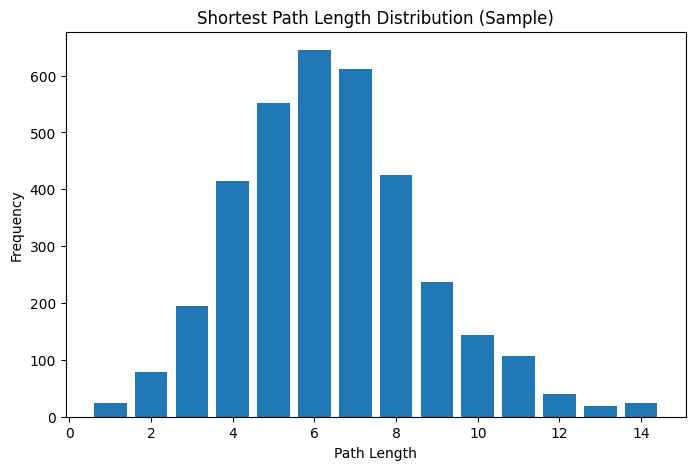

Average path length: 6.41
Path length std: 2.30
Calculating degree distribution...
Average out-degree (excluding isolates): 3.62
Average in-degree (excluding isolates): 1.63
Average out-degree (excluding isolates): 3.62
Average in-degree (excluding isolates): 1.63


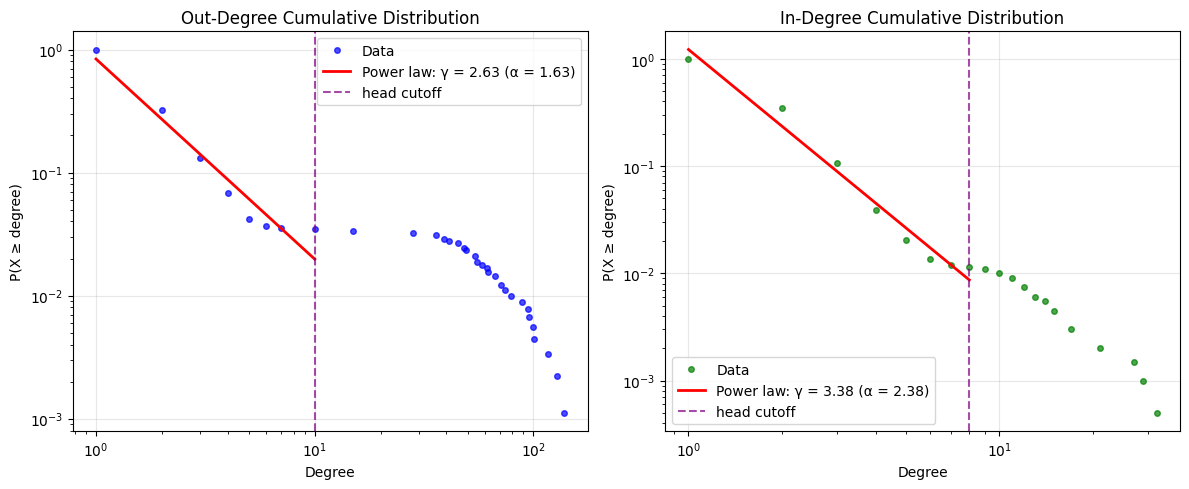

Out-degree power law: γ = 2.63 (CDF: α = 1.63), x_max = 10
In-degree power law: γ = 3.38 (CDF: α = 2.38), x_max = 8
=== Statistics Complete ===


In [ ]:
# using pyplenet.analysis.runstats

import pyplenet.analysis as pa
from pyplenet.core.graph import FileBasedGraph
subgraph = FileBasedGraph('subgraph_data')

pa.runstats(subgraph)

The first thing to note is that there are differences in the shortest path results between the ```pyplenet.analysis``` methods and the ```networkx``` methods. These differences are still being tackled and for now the results of networkx should be taken as true. For the time being we ignore the current pyplenet shortest path distribution plot.

We therefore focus on the degree distribution to validate the proper functioning of this package. 
The ```pyplenet.analysis.plot_degree_distributions``` method that is called by ```runstats``` creates complementary cumulative distribution plots, these are a typical format in network science used to portray properties of degree distributions, such as a power law.    

Sala et al. (2011) found that most real life social networks do not follow a pure power law. Instead their findings show coherence to a power law (straight line on a log-log plots) at lower degrees followed by a sharp cutoff (downward curve) at higher degrees. This is due to the fact that real people can't uphold an infinite amount of connections, so the tail-end gets truncated. Our distributions almost follow this trend with one curiosity: there are very few nodes inbetween the high-degree and low-degree nodes. This is seen in the CCDF plots by the flat region in the middle.

Whether this is an artifact of our network synthesis, representative of a real phenomena in *work / school* connection networks, or a limitation thanks to the resolution of our *work / school* dataset would require further investigation.

##### Visualization

When converted, the subgraph can be plotted using `networkx`'s plotting functions.

Below we plot the extracted subgraph, coloring nodes by their group and highlighting our center node.

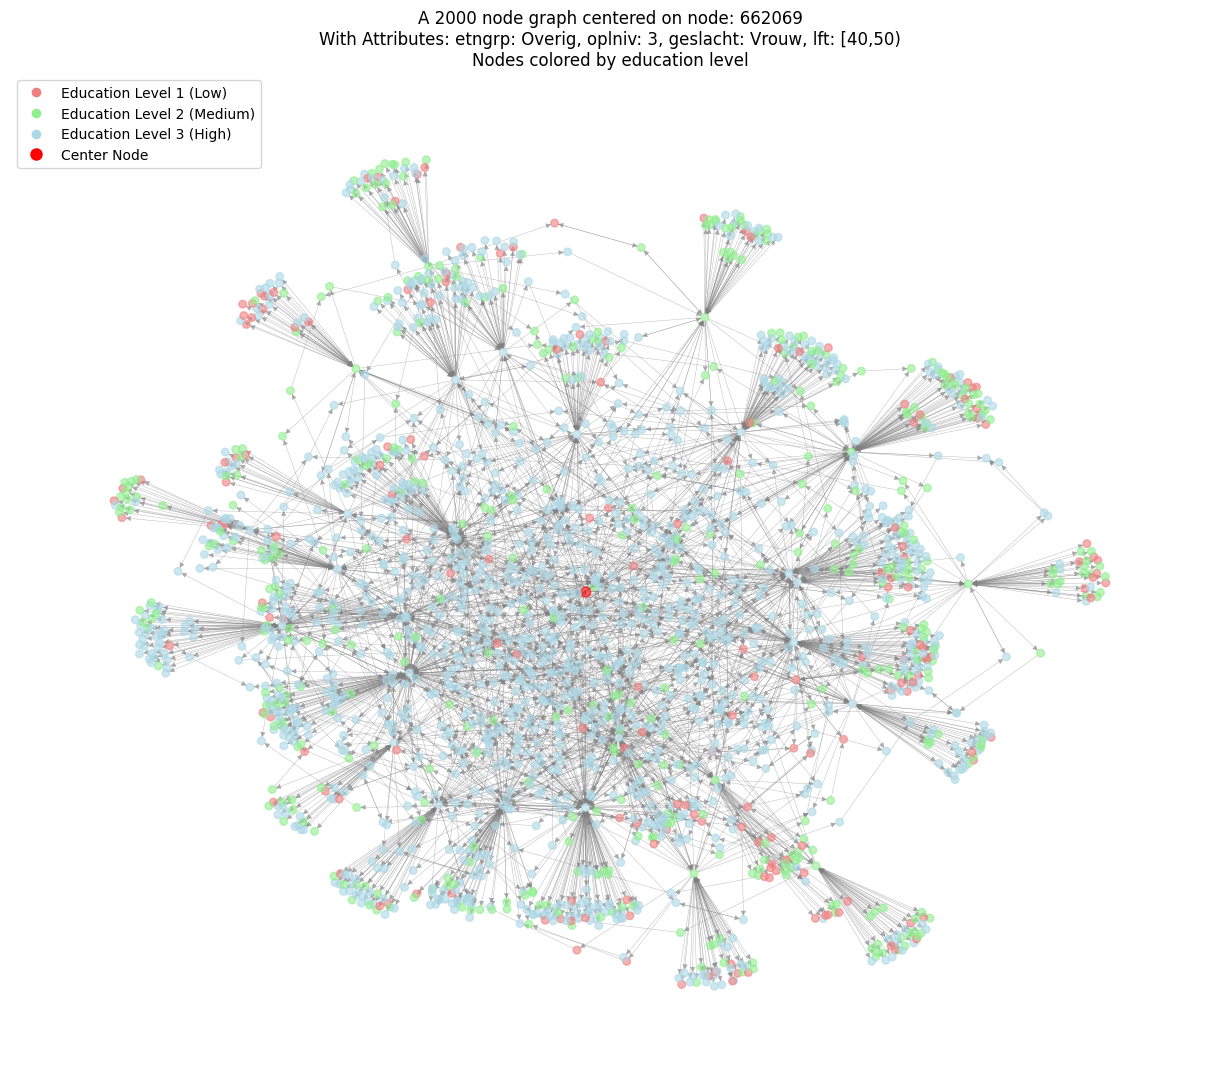

In [ ]:
# Visualize network
plt.figure(figsize=(12, 10))

pos = nx.spring_layout(nx_graph, k=2, iterations=100)
node_sizes = [30] * nx_graph.number_of_nodes() 

# Node coloring and labelling
# reverse the nodes to group dict.
node_to_group = {} 
for group, nodes in subgraph.group_to_nodes.items():
    for node in nodes:
        node_to_group[node] = group

education_colors = {1: 'lightcoral', 2: 'lightgreen', 3: 'lightblue'}
education_labels = {1: 'Education Level 1 (Low)', 2: 'Education Level 2 (Medium)', 3: 'Education Level 3 (High)'}

node_colors = []
for node in nx_graph.nodes():
    if node in node_to_group:
        group_id = node_to_group[node]
        attrs = subgraph.group_to_attrs.get(group_id, {})
        education_level = attrs.get('oplniv', 1)  # Default to level 1 if not found
        node_colors.append(education_colors.get(education_level, 'gray'))
    else:
        node_colors.append('gray')

# Highlight center node
center_idx = list(nx_graph.nodes()).index(selected_node)
node_colors[center_idx] = 'red'
node_sizes[center_idx] = 50 

# Get attributes of the selected node for the title
node_attrs = {}
if selected_node in node_to_group:
    center_group = node_to_group[selected_node]
    node_attrs = subgraph.group_to_attrs.get(center_group, {})

# Format attributes for display
attrs_str = ", ".join([f"{k}: {v}" for k, v in node_attrs.items()])

nx.draw(nx_graph, pos, node_color=node_colors, node_size=node_sizes, 
        with_labels=False, edge_color='gray', alpha=0.6, arrows=True,
        width=0.3, arrowsize=8)  # Thinner edges and smaller arrows

plt.title(f'A {nx_graph.number_of_nodes()} node graph centered on node ID: {selected_node}\n{selected_node} Attributes: {attrs_str}\nNodes colored by education level')

# legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=education_labels[level],
                         markerfacecolor=color, markersize=8) 
                  for level, color in education_colors.items()]
legend_elements.append(Line2D([0], [0], marker='o', color='w', label='Center Node',
                             markerfacecolor='red', markersize=10))

plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0, 1))
plt.show()

#### 8. Exporting

The ```pyplenet.export``` module contains many export functions for various standard graph formats.

The module also includes export function for the graph metadata ```FileBasedGraph.group_to_attrs``` and ```FileBasedGraph.group_to_nodes``` dicts.

In [ ]:
import os
from pyplenet import export

# Create our export directory
os.makedirs("Exports", exist_ok=True)

export.edge_txt(subgraph, "Exports/subgraph.txt")
export.mtx(subgraph, "Exports/subgraph.mtx")

export.group_to_attrs_csv(subgraph.group_to_attrs, "Exports/group_attributes.csv")
print("Exported group attributes")

export.group_to_nodes_csv(subgraph.group_to_nodes, "Exports/group_nodes.csv")
print("Exported group-to-nodes mapping")

Edge list exported to Exports/subgraph.txt
Matrix Market format exported to Exports/subgraph.mtx
Exported group attributes
Exported group-to-nodes mapping


#### 9. Example Experiment

Below follows an example where highly-educated foreign dutch girl/women's immediate school/work circles (300 people) are analyzed in terms of connectivity by analyzing the degree distribution of subgraphs surrounding them.

**Step 1. Filtering Nodes**

As done in section 5 the nodes are filtered using the metadata dictionaries. 
Two important steps are added for the this experiment:
- The nodes are then grouped by their age group (via further dictionary-work)
- The grouped nodes are filtered to include only 10 non-isolates using the ```FileBasedGraph.get_non_isolates_batch()``` method. This is so we can be sure to extract succesful subgraphs every time, and so we have 10 trials per age group.

In [ ]:
from pyplenet.core.graph import FileBasedGraph

# Use the exisiting graph data in graph_data to define a FileBasedGraph object
graph = FileBasedGraph("graph_data")
print(f"Loaded graph: {graph.number_of_nodes()} nodes, {graph.number_of_edges()} edges")

# Target criteria: highly educated foreign women (oplniv: 3, etngrp: "Overig", geslacht: "Vrouw")
target_criteria = {
    'etngrp': "Overig",
    'oplniv': 3,
    'geslacht': "Vrouw"
}

print("Grouping by age")
# Grouping the candidates by age category in a dict
candidates_by_age = {}

for group_id, attrs in graph.group_to_attrs.items():
    if all(attrs.get(key) == value for key, value in target_criteria.items()):
        age_category = attrs.get('lft')
        if age_category not in candidates_by_age:
            candidates_by_age[age_category] = []
        candidates_by_age[age_category].extend(graph.group_to_nodes[group_id])
    

filtered_candidates = {}
for age_group, nodes in candidates_by_age.items():
    # Use method to get up to 10 non-isolated nodes
    non_isolates = graph.get_non_isolates_batch(nodes, max_count=10)
    filtered_candidates[age_group] = non_isolates
    
print("\nCollected 10 non-isolates per age group")

Loaded graph: 857683 nodes, 30833570 edges
Grouping by age

Collected 10 non-isolates per age group


**Steps 2, Subgraph extraction and 3, Analysis**

For every age group's nodes, a subgraph of 300 nodes is extracted and the degree statistics distribution saved.

While this experiment simply analyzes the degree statistics of every subgraph, anything could be done with them at this stage. If exported, they may be used to run models externally as well.

In [ ]:
# Analyze subgraphs for each age group
import numpy as np
import shutil
import matplotlib.pyplot as plt
import pyplenet.analysis as pa
age_group_results = {}

for age_group, nodes in filtered_candidates.items():
    
    degrees_for_age = []
    valid_subgraphs = 0
    
    # Analyze subgraph for each node in this age group
    for i, center_node in enumerate(nodes):
        # Extract subgraph
        subgraph = graph.extract_subgraph(
            center_node=center_node,
            max_nodes=300,
            output_path=f"temp_subgraph_{age_group}_{i}"
        )
        
        # collect degree statistics
        _, out_degrees = pa.degree_distribution(subgraph)
        degrees_for_age.extend(out_degrees)
        valid_subgraphs += 1
    
        shutil.rmtree(f"temp_subgraph_{age_group}_{i}")
        
    if degrees_for_age:
        age_group_results[age_group] = {
            'degrees': degrees_for_age,
            'avg_degree': np.mean(degrees_for_age),
            'std_degree': np.std(degrees_for_age),
            'valid_subgraphs': valid_subgraphs
        }
        print(f"Age {age_group}: {valid_subgraphs} subgraphs, avg degree = {np.mean(degrees_for_age):.2f}")

Age [0,20): 10 subgraphs, avg degree = 3.90
Age [20,30): 10 subgraphs, avg degree = 4.97
Age [30,40): 10 subgraphs, avg degree = 4.62
Age [40,50): 10 subgraphs, avg degree = 4.94
Age [50,60): 10 subgraphs, avg degree = 5.08
Age [60,70): 10 subgraphs, avg degree = 4.91
Age [70,80): 10 subgraphs, avg degree = 5.11


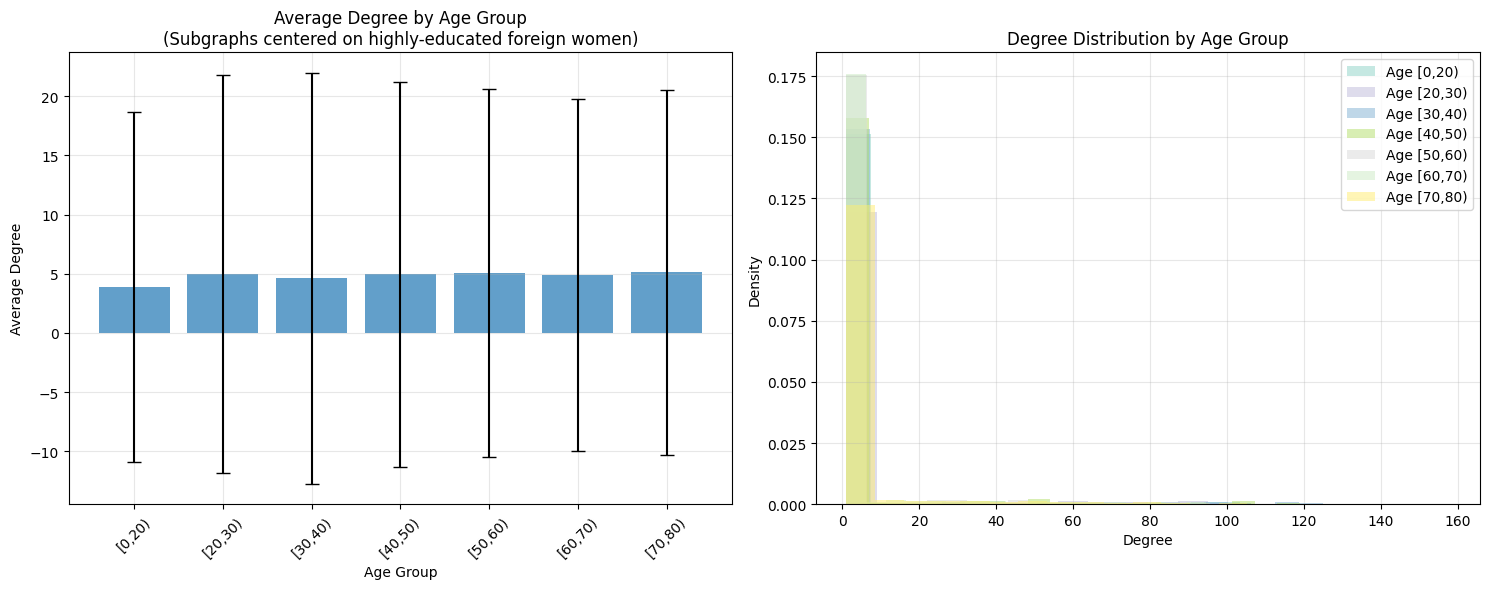


Summary Statistics:
Age Group | Avg Degree | Std Dev | Subgraphs
---------------------------------------------
 [0,20)   |    3.90    |  14.79  |    10    
 [20,30)  |    4.97    |  16.79  |    10    
 [30,40)  |    4.62    |  17.37  |    10    
 [40,50)  |    4.94    |  16.27  |    10    
 [50,60)  |    5.08    |  15.54  |    10    
 [60,70)  |    4.91    |  14.85  |    10    
 [70,80)  |    5.11    |  15.40  |    10    


In [33]:
# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

age_groups = list(age_group_results.keys())
avg_degrees = [age_group_results[age]['avg_degree'] for age in age_groups]
std_degrees = [age_group_results[age]['std_degree'] for age in age_groups]

ax1.bar(range(len(age_groups)), avg_degrees, yerr=std_degrees, capsize=5, alpha=0.7)
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Degree')
ax1.set_title('Average Degree by Age Group\n(Subgraphs centered on highly-educated foreign women)')
ax1.set_xticks(range(len(age_groups)))
ax1.set_xticklabels(age_groups, rotation=45)
ax1.grid(True, alpha=0.3)

colors = plt.cm.Set3(np.linspace(0, 1, len(age_groups)))
for i, age in enumerate(age_groups):
    degrees = age_group_results[age]['degrees']
    ax2.hist(degrees, bins=20, alpha=0.5, label=f'Age {age}', color=colors[i], density=True)

ax2.set_xlabel('Degree')
ax2.set_ylabel('Density')
ax2.set_title('Degree Distribution by Age Group')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nSummary Statistics:")
print("Age Group | Avg Degree | Std Dev | Subgraphs")
print("-" * 45)
for age in sorted(age_groups):
    results = age_group_results[age]
    print(f"{age:^9} | {results['avg_degree']:^10.2f} | {results['std_degree']:^7.2f} | {results['valid_subgraphs']:^9}")

We see no significant variation in any aspect of the degree statistics between the age groups of highly-educated foreign women in our graphs.

#### 10. Discussion

This project successfully transformed Kamiel Gulpen's theoretical framework for synthetic social network generation into a comprehensive Python package. The primary achievement of ```pyplenet``` lies in its modularization and universalization of the original work, making it useable with any similar data therefore making it accessible to researchers across multiple disciplines. Secondary achievements include the development of a custom file-based graph storage system that enables efficient handling of large-scale networks (>1M nodes, >20M edges) while preserving metadata for node filtering and subgraph extraction. Additionally, the package provides comprehensive export capabilities across multiple standard network formats, a dedicated analysis module, and a tutorial framework.

**Results and Validation**

The validation efforts conducted throughout this work show both potential and current limitations of ``pyplenet``. The degree distribution analysis demonstrates that the generated networks exhibit characteristics consistent with real-world social networks, including power-law behavior in the low-degree region and the expected cutoff at higher degrees as described by Sala et al. (2011). However, the presence of a flat region in the middle of the cumulative distribution plots raises questions about the network generation process that require further investigation.

The example experiment comparing degree statistics across age groups of highly-educated foreign women presented inconclusive results, showing no significant variation between different age groups. While this could reflect genuine characteristics of work/school networks, it may also indicate limitations in either the group-level data resolution or the network generation algorithm itself. These ambiguous findings highlight the need for more comprehensive validation. A suggestion is to use diverse datasets of other well-studied real networks and compare the topology of the ```pyplenet``` synthesized analogues to empirical data.

**Current Limitations**

Validation remains limited both in scope and rigor, this project focused on retaining faithfulness to Gulpen's original results rather than establishing broader validity across different network types and contexts.

Technical issues persist within the analysis module, particularly discrepancies between `pyplenet`'s path length calculations and those produced by NetworkX. While undermining the package's self-sufficiency, the networkx conversion methods act as a fallback for this aspect of the package.

The original project plan included a worked example of an intervention study using an agent based model. This was replaced by the example experiment in section 9. Preliminary results when prototyping the model showed a problematic lack of variation in results when analyzing the subgraphs centered on different age groups. The secondary issue was that the ABM model's results themselves were too stochastic on the small subgraphs (confirmed by multiple trials of the prototype model on the same subgraph). The solution of increasing the size of the subgraphs was considered but proved unfeasible due to time (either development/optimization time or computation time) constraints. 

Instead it was decided to present an example dummy-experiment. The goal is to show users how they may filter nodes by their attributes and extract subgraphs to be used for their own goals.

**Future Directions**

The path forward for `pyplenet` development should prioritize comprehensive validation using diverse, high-resolution social network datasets from multiple domains. Comparing `pyplenet`'s 2GRN to alternative network generation algorithms as well as empirical social network data could reveal artifacts specific to any single method. Once this issue is tackled and the true boundaries of `pyplenet`'s validity are established, the package can confidently be expanded with additional features and capabilities.

Following successful validation, the implementation of an agent-based modeling module would expand the package's utility for dynamic network studies and policy simulations. Additionally, expanding the suite of network analysis tools would enhance `pyplenet`'s value as a complete research platform rather than simply a network generation tool.

#### 11. References

Barabási, A.-L., & Albert, R. (1999). Emergence of scaling in random networks. Science, 286(5439), 509–512. https://doi.org/10.1126/science.286.509

Clauset, A., Shalizi, C. R., & Newman, M. E. J. (2009). Power-law distributions in empirical data. SIAM Review, 51(4), 661–703. https://doi.org/10.1137/070710111

Gulpen, K. (2022, August). A digital twin of Amsterdam's social network [Master’s thesis, University of Amsterdam].

Grefenstette, J. J., Brown, S. T., Rosenfeld, R., Depasse, J., Stone, N. T., Cooley, P. C., Wheaton, W. D., Fyshe, A., Galloway, D. D., Sriram, A., Guclu, H., Abraham, T., & Burke, D. S. (2013). FRED (A Framework for Reconstructing Epidemic Dynamics): An open-source software system for modeling infectious diseases and control strategies using census-based populations. *BMC Public Health, 13*(1), 940. https://doi.org/10.1186/1471-2458-13-940

Sala, A., Cao, L., Wilson, C., Zablit, R., Zheng, H., & Zhao, B. Y. (2011). Revisiting degree distribution models for social graph analysis. arXiv. https://arxiv.org/abs/1108.0027